In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
data_corr = data.corr()
data_corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7755681588>,
      dtype=object)

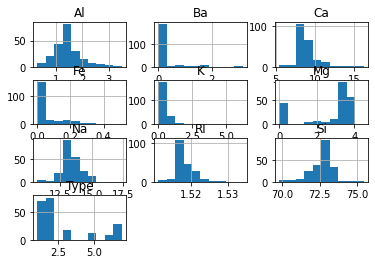

In [7]:
data.hist()

In [8]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(data, test_size = 0.2)
train_set.shape

(171, 10)

In [9]:
test_set.shape

(43, 10)

In [10]:
data_corr['Type'].sort_values()

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7748fb3240>,
      dtype=object)

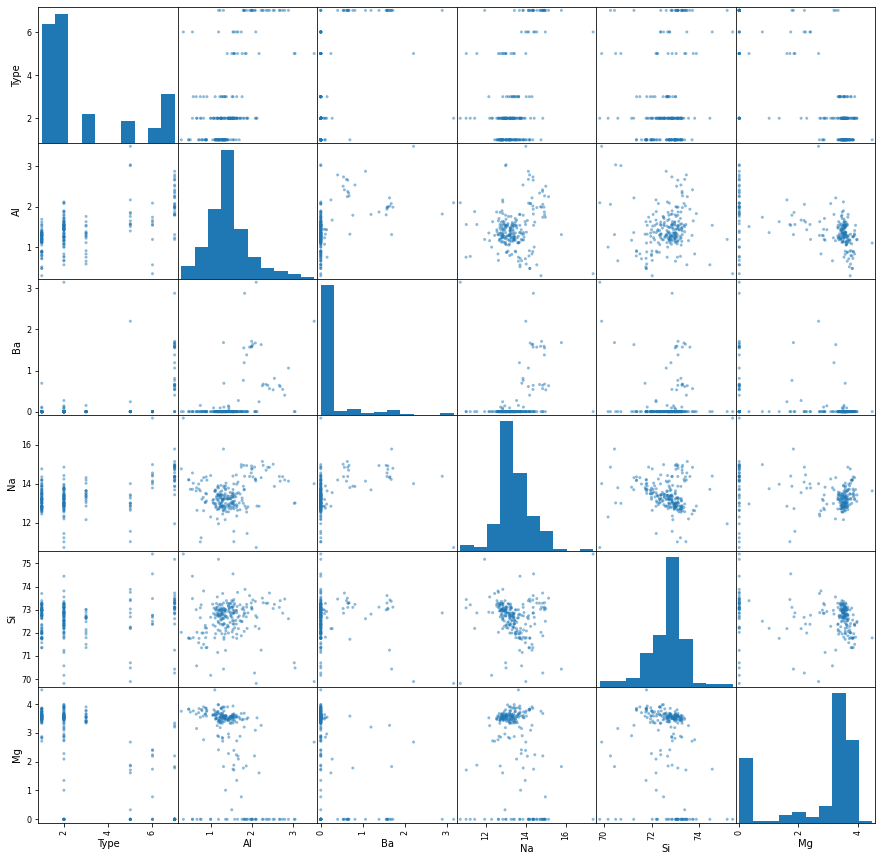

In [12]:
from pandas.plotting import scatter_matrix

attribute = ['Type','Al','Ba','Na','Si','Mg']
scatter_matrix(data[attribute],figsize=(15,15))

In [13]:
train_y = train_set['Type']
test_y = test_set['Type']

del train_set['Type']
del test_set['Type']

In [18]:
del train_set['Ca']
del test_set['Ca']
del train_set['K']
del test_set['K']
del train_set['RI']
del test_set['RI']
del train_set['Fe']
del test_set['Fe']


In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(train_set,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_set, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [34]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", knn.predict(some_data))
print("레이블:", list(some_labels))

예측: [6 1 1 2]
레이블: [6, 1, 3, 2]


In [20]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", tree_clf.predict(some_data))
print("레이블:", list(some_labels))

예측: [6 1 3 2]
레이블: [6, 1, 3, 2]


In [21]:
from sklearn.metrics import mean_squared_error
predictions = tree_clf.predict(train_set)
lin_mse = mean_squared_error(train_y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [1.77951304 1.39326109 1.5718105  1.78226558 1.49509    0.76696499
 1.78226558 1.11143786 1.32842233 1.51463449]
평균: 1.4525665458441415
표준 편차: 0.3081434579521911


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(n_estimators=100, random_state=42)
forest_reg.fit(train_set, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", forest_reg.predict(some_data))
print("레이블:", list(some_labels))

예측: [6 1 3 2]
레이블: [6, 1, 3, 2]


In [26]:

scores = cross_val_score(forest_reg, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


점수: [1.31233465 0.54232614 0.59408853 1.60879933 1.2833779  0.59408853
 1.84709629 1.05718828 1.69774938 1.59041245]
평균: 1.212746146719716
표준 편차: 0.46809834934790434


In [35]:
print("결정트리 훈련 세트의 정확도:",tree_clf.score(train_set,train_y))
print("랜덤포레스트 훈련 세트의 정확도:",forest_reg.score(train_set,train_y))
print('Kneighbor 훈련 세트의 정확도 : ', knn.score(train_set,train_y))


print("결정트리 테스트 세트의 정확도:",tree_clf.score(test_set,test_y))
print("랜덤포레스트 테스트 세트의 정확도:",forest_reg.score(test_set,test_y))
print('Kneighbor 테스트 세트의 정확도 : ', knn.score(test_set,test_y))

결정트리 훈련 세트의 정확도: 1.0
랜덤포레스트 훈련 세트의 정확도: 1.0
Kneighbor 훈련 세트의 정확도 :  0.7368421052631579
결정트리 테스트 세트의 정확도: 0.6744186046511628
랜덤포레스트 테스트 세트의 정확도: 0.7674418604651163
Kneighbor 테스트 세트의 정확도 :  0.6976744186046512
